# COVID-19_Medical_care_need

## Project description

Model developed to predict the **need of semi-intensive or intensive medical care of patients based on regular blood and urine exams**.

In the COVID-19 pandemic crisis, a main issue is to manage the healthcare infra structure in order to serve the infected people. Not every person need semi-intensive or intensive medical care and these medical ressources are scarse due to the ammount of infected people.

In that way this project was created with **the target to predict the need of semi-intensive or intensive care of patients infected with the novel SARS-CoV-2 virus**, to help the healthcare workers to **manage the infrastructure** and to **improve the possibilities to sava lifes**.

# Import Resources

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline




# from Tensorflow 2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from tensorflow.keras import regularizers

# from Sci-Kit Learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import confusion_matrix,classification_report


import lightgbm as lgb

In [2]:
df = pd.read_excel('covid19/COVID-19_dataset.xlsx')

In [3]:
df.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.describe()

,Patient age quantile,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
count,5644.000000,5644.000000,5644.000000,5644.000000,6.030000e+02,6.030000e+02,6.020000e+02,5.990000e+02,6.020000e+02,6.020000e+02,...,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.000000e+01,2.000000e+01,2.700000e+01
mean,9.318391,0.013997,0.008859,0.007264,-2.186214e-09,-1.601319e-08,-3.535004e-10,7.438142e-09,8.424447e-09,-7.866736e-09,...,-1.379737e-10,8.416397e-09,-1.655685e-09,4.139211e-10,-7.472139e-09,6.070843e-09,-2.469729e-08,4.656613e-09,6.332993e-09,5.243001e-09
std,5.777903,0.117489,0.093713,0.084929,1.000830e+00,1.000830e+00,1.000832e+00,1.000836e+00,1.000832e+00,1.000832e+00,...,1.019049e+00,1.019049e+00,1.019049e+00,1.019049e+00,1.019049e+00,1.019049e+00,1.019049e+00,1.025978e+00,1.025978e+00,1.019049e+00
min,0.000000,0.000000,0.000000,0.000000,-4.501420e+00,-4.345603e+00,-2.552426e+00,-2.457575e+00,-3.970608e+00,-1.865070e+00,...,-1.999560e+00,-1.244817e+00,-3.082674e+00,-3.568877e+00,-2.925618e+00,-2.985592e+00,-1.175907e+00,-1.532932e+00,-1.480526e+00,-2.900254e+00
25%,4.000000,0.000000,0.000000,0.000000,-5.188074e-01,-5.862439e-01,-6.053457e-01,-6.624832e-01,-5.679496e-01,-7.307069e-01,...,-1.122574e+00,-5.348102e-01,-3.308668e-01,-9.210583e-02,-5.117720e-01,-5.397211e-01,-8.169898e-01,-1.214975e-01,-5.527296e-01,-4.852787e-01
50%,9.000000,0.000000,0.000000,0.000000,5.340703e-02,4.031596e-02,-1.217160e-01,-1.015171e-01,1.385207e-02,-1.426696e-02,...,2.677689e-01,-2.120799e-01,-1.181667e-02,2.942021e-01,7.743482e-02,5.633191e-02,-1.599549e-01,-1.174366e-02,-1.381825e-01,1.826928e-01
75%,14.000000,0.000000,0.000000,0.000000,7.171751e-01,7.295320e-01,5.314981e-01,6.838353e-01,6.661759e-01,5.976919e-01,...,7.383496e-01,2.305214e-02,6.661649e-01,5.115003e-01,4.385609e-01,5.085100e-01,4.500090e-01,-1.174366e-02,2.763648e-01,5.937525e-01
max,19.000000,1.000000,1.000000,1.000000,2.662704e+00,2.671868e+00,9.532034e+00,3.713052e+00,3.645706e+00,3.764100e+00,...,1.337265e+00,3.236524e+00,1.703078e+00,1.042674e+00,1.940087e+00,2.029471e+00,2.205371e+00,2.841856e+00,2.862350e+00,1.826932e+00


In [5]:
# All the features
[col for col in df.columns]

['Patient ID',
 'Patient age quantile',
 'SARS-Cov-2 exam result',
 'Patient addmited to regular ward (1=yes, 0=no)',
 'Patient addmited to semi-intensive unit (1=yes, 0=no)',
 'Patient addmited to intensive care unit (1=yes, 0=no)',
 'Hematocrit',
 'Hemoglobin',
 'Platelets',
 'Mean platelet volume ',
 'Red blood Cells',
 'Lymphocytes',
 'Mean corpuscular hemoglobin concentration\xa0(MCHC)',
 'Leukocytes',
 'Basophils',
 'Mean corpuscular hemoglobin (MCH)',
 'Eosinophils',
 'Mean corpuscular volume (MCV)',
 'Monocytes',
 'Red blood cell distribution width (RDW)',
 'Serum Glucose',
 'Respiratory Syncytial Virus',
 'Influenza A',
 'Influenza B',
 'Parainfluenza 1',
 'CoronavirusNL63',
 'Rhinovirus/Enterovirus',
 'Mycoplasma pneumoniae',
 'Coronavirus HKU1',
 'Parainfluenza 3',
 'Chlamydophila pneumoniae',
 'Adenovirus',
 'Parainfluenza 4',
 'Coronavirus229E',
 'CoronavirusOC43',
 'Inf A H1N1 2009',
 'Bordetella pertussis',
 'Metapneumovirus',
 'Parainfluenza 2',
 'Neutrophils',
 'Urea',

In [6]:
all_null = [feature for feature in df.columns if df[feature].isnull().sum() == len(df)] 

In [7]:
# all these features are completelly null, so they are not important for the analysis
all_null.append('Patient ID')

In [8]:
print(all_null)

['Mycoplasma pneumoniae', 'Urine - Sugar', 'Partial thromboplastin time\xa0(PTT)\xa0', 'Prothrombin time (PT), Activity', 'D-Dimer', 'Patient ID']


In [9]:
df.drop(all_null, inplace=True, axis=1)

In [10]:
# all the not numerical features
[feature for feature in df.columns if not np.issubdtype(df[feature].dtype, np.number) if feature not in 'SARS-Cov-2 exam result']

['Respiratory Syncytial Virus',
 'Influenza A',
 'Influenza B',
 'Parainfluenza 1',
 'CoronavirusNL63',
 'Rhinovirus/Enterovirus',
 'Coronavirus HKU1',
 'Parainfluenza 3',
 'Chlamydophila pneumoniae',
 'Adenovirus',
 'Parainfluenza 4',
 'Coronavirus229E',
 'CoronavirusOC43',
 'Inf A H1N1 2009',
 'Bordetella pertussis',
 'Metapneumovirus',
 'Parainfluenza 2',
 'Influenza B, rapid test',
 'Influenza A, rapid test',
 'Strepto A',
 'Urine - Esterase',
 'Urine - Aspect',
 'Urine - pH',
 'Urine - Hemoglobin',
 'Urine - Bile pigments',
 'Urine - Ketone Bodies',
 'Urine - Nitrite',
 'Urine - Urobilinogen',
 'Urine - Protein',
 'Urine - Leukocytes',
 'Urine - Crystals',
 'Urine - Hyaline cylinders',
 'Urine - Granular cylinders',
 'Urine - Yeasts',
 'Urine - Color']

In [11]:
# saves the non numeric features
not_numeric = [feature for feature in df.columns if not np.issubdtype(df[feature].dtype, np.number) if feature not in 'SARS-Cov-2 exam result']

In [12]:
# transforms some possible string features into numeric, if the string is in numerical form
df.update(df.apply(pd.to_numeric, errors='coerce'))

In [13]:
# shows the unique values of all the features, which are not numbers
df_subset = df.select_dtypes(exclude=[np.number]).copy()
[print(f'{col}: {df_subset[col].value_counts().index}') for col in df_subset.columns]

SARS-Cov-2 exam result: Index(['negative', 'positive'], dtype='object')
Respiratory Syncytial Virus: Index(['not_detected', 'detected'], dtype='object')
Influenza A: Index(['not_detected', 'detected'], dtype='object')
Influenza B: Index(['not_detected', 'detected'], dtype='object')
Parainfluenza 1: Index(['not_detected', 'detected'], dtype='object')
CoronavirusNL63: Index(['not_detected', 'detected'], dtype='object')
Rhinovirus/Enterovirus: Index(['not_detected', 'detected'], dtype='object')
Coronavirus HKU1: Index(['not_detected', 'detected'], dtype='object')
Parainfluenza 3: Index(['not_detected', 'detected'], dtype='object')
Chlamydophila pneumoniae: Index(['not_detected', 'detected'], dtype='object')
Adenovirus: Index(['not_detected', 'detected'], dtype='object')
Parainfluenza 4: Index(['not_detected', 'detected'], dtype='object')
Coronavirus229E: Index(['not_detected', 'detected'], dtype='object')
CoronavirusOC43: Index(['not_detected', 'detected'], dtype='object')
Inf A H1N1 2009

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [14]:
# turn nao realizado into NaN
df['Urine - pH'][df['Urine - pH'] == 'Não Realizado'] = np.nan
df['Urine - pH'].value_counts()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


5.0    25
6.0    14
7.0    12
6.5    10
5.5     4
7.5     3
8.0     1
Name: Urine - pH, dtype: int64

In [15]:
# transforms the string into zero
df['Urine - Leukocytes'][df['Urine - Leukocytes'] == '<1000'] = 0
df['Urine - Leukocytes'].value_counts()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


0.0          9
3000.0       9
2000.0       7
4000.0       7
1000.0       4
8000.0       3
5000.0       2
7000.0       2
10000.0      2
29000.0      2
38000.0      2
22000.0      2
32000.0      1
28000.0      1
124000.0     1
77000.0      1
5300.0       1
624000.0     1
40000.0      1
10600.0      1
43000.0      1
3310000.0    1
2500.0       1
23000.0      1
2600.0       1
19000.0      1
16000.0      1
229000.0     1
5942000.0    1
6000.0       1
4600.0       1
Name: Urine - Leukocytes, dtype: int64

In [16]:
 # defines the largest Leukocytes values to be 300.000
df['Urine - Leukocytes'][df['Urine - Leukocytes'] > 300000] = 300000

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


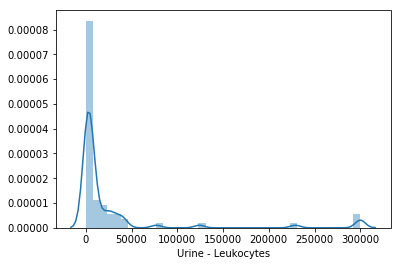

In [17]:
sns.distplot(df['Urine - Leukocytes'][df['Urine - Leukocytes'] < 500000].apply(int))

In [18]:
# separates the Leukocytes into categories accordingly to the distribution of it
df['Urine - Leukocytes'] = pd.qcut(df['Urine - Leukocytes'], q = [0.1, 0.2, 0.3, 0.4, 0.75, 1])

In [19]:
# creating dummy
#not_numeric = [feature for feature in df.columns if not np.issubdtype(df[feature].dtype, np.number) if feature not in 'SARS-Cov-2 exam result']
is_string = [col for col in df_subset.columns if col not in 'SARS-Cov-2 exam result']
for feature in is_string:
    df[[(str(feature) + '_' + str(col)) for col in pd.get_dummies(df[feature]).columns]] = pd.get_dummies(df[feature])
    df.drop(feature,axis=1,inplace=True)

In [20]:
df.head()

,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,...,Urine - Crystals_Oxalato de Cálcio -++,Urine - Crystals_Urato Amorfo +++,Urine - Crystals_Urato Amorfo --+,Urine - Hyaline cylinders_absent,Urine - Granular cylinders_absent,Urine - Yeasts_absent,Urine - Color_citrus_yellow,Urine - Color_light_yellow,Urine - Color_orange,Urine - Color_yellow
0,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
1,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,0.102004,...,0,0,0,0,0,0,0,0,0,0
2,8,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
3,5,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
4,15,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0


In [21]:
# shows the feature title and it's type
[print(f'{col} {type(col)}') for col in df.columns]

Patient age quantile <class 'str'>
SARS-Cov-2 exam result <class 'str'>
Patient addmited to regular ward (1=yes, 0=no) <class 'str'>
Patient addmited to semi-intensive unit (1=yes, 0=no) <class 'str'>
Patient addmited to intensive care unit (1=yes, 0=no) <class 'str'>
Hematocrit <class 'str'>
Hemoglobin <class 'str'>
Platelets <class 'str'>
Mean platelet volume  <class 'str'>
Red blood Cells <class 'str'>
Lymphocytes <class 'str'>
Mean corpuscular hemoglobin concentration (MCHC) <class 'str'>
Leukocytes <class 'str'>
Basophils <class 'str'>
Mean corpuscular hemoglobin (MCH) <class 'str'>
Eosinophils <class 'str'>
Mean corpuscular volume (MCV) <class 'str'>
Monocytes <class 'str'>
Red blood cell distribution width (RDW) <class 'str'>
Serum Glucose <class 'str'>
Neutrophils <class 'str'>
Urea <class 'str'>
Proteina C reativa mg/dL <class 'str'>
Creatinine <class 'str'>
Potassium <class 'str'>
Sodium <class 'str'>
Alanine transaminase <class 'str'>
Aspartate transaminase <class 'str'>
Gam

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [22]:
# defines the layout to the plotting
sns.set_context('paper', font_scale=1.5)
sns.set_style('whitegrid')

In [23]:
df['Patient age quantile'].max()

19

In [24]:
df['Patient age quantile'].min()

0

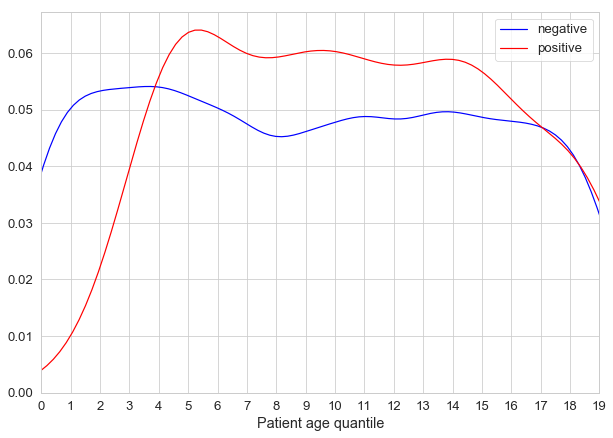

In [25]:
# plot about the age distribution for someone with Cov-2 and without it
fig = plt.figure(figsize=(10,7))
fig = sns.distplot(df['Patient age quantile'][df['SARS-Cov-2 exam result']=='negative'], kde=True, hist=False, color='blue', label='negative')
fig = sns.distplot(df['Patient age quantile'][df['SARS-Cov-2 exam result']=='positive'], kde=True, hist=False, color='red', label='positive')
fig = plt.xticks(np.arange(0, 20, step=1))
fig = plt.xlim(df['Patient age quantile'].min(),df['Patient age quantile'].max())
fig = plt.legend(loc='best')



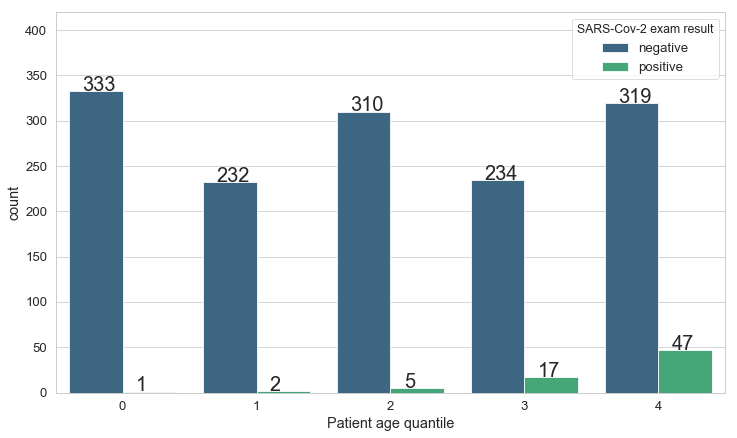

In [26]:
fig = plt.figure(figsize=(12,7))
fig = sns.countplot(x='Patient age quantile',data=df[df['Patient age quantile']<=4], palette='viridis',
             hue='SARS-Cov-2 exam result')
for p in fig.patches:
    fig.annotate('{:.0f}'.format(round(p.get_height())), (p.get_x()+0.1, p.get_height()+0.2), fontsize=20)
fig = plt.ylim(0,420)

In [27]:
# gets the numerical features
num_features = [feature for feature in df.columns if np.issubdtype(df[feature].dtype, np.number)]

In [28]:
print(f'length numerical features: {len(num_features)}')
print(f'length total features: {len(df.columns)}')

length numerical features: 151
length total features: 152


In [29]:
def plot_pie(data, feature):
    plt.pie(data[feature].value_counts(), autopct='%1.1f%%',startangle=90, colors=['#aaffd5', '#fec0cb'],
        labels=data[feature].value_counts().index)
    plt.legend()
    print(df[feature].value_counts())

0    5603
1      41
Name: Patient addmited to intensive care unit (1=yes, 0=no), dtype: int64


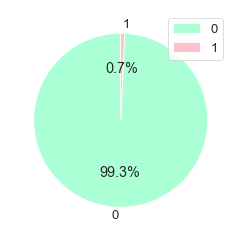

In [30]:
plot_pie(df,'Patient addmited to intensive care unit (1=yes, 0=no)' )

0    5594
1      50
Name: Patient addmited to semi-intensive unit (1=yes, 0=no), dtype: int64


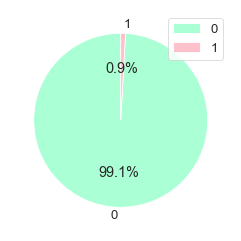

In [31]:
plot_pie(df,'Patient addmited to semi-intensive unit (1=yes, 0=no)' )

0    5565
1      79
Name: Patient addmited to regular ward (1=yes, 0=no), dtype: int64


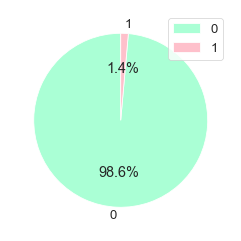

In [32]:
plot_pie(df,'Patient addmited to regular ward (1=yes, 0=no)')

In [33]:
patient_cols = [col for col in df.columns if 'Patient addmited' in col]

In [34]:
df['Medical_care_needed'] = (df[patient_cols]==1).any(axis=1).astype(int)

In [35]:
df['Medical_care_needed'].sum()

170

0    5474
1     170
Name: Medical_care_needed, dtype: int64


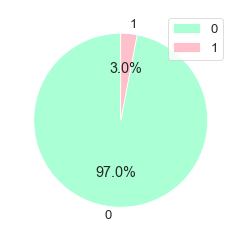

In [36]:
plot_pie(df, 'Medical_care_needed')

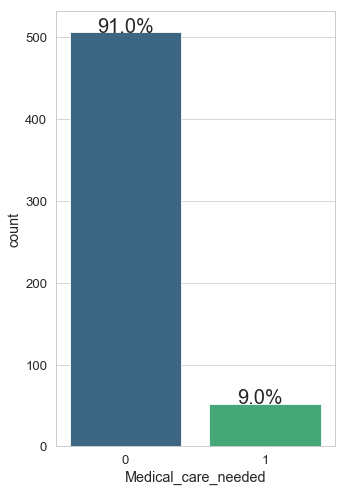

In [37]:
fig = plt.figure(figsize=(5,8))
fig = sns.countplot(x='Medical_care_needed',data=df[df['SARS-Cov-2 exam result']=='positive'], palette='viridis')
for p in fig.patches:
    fig.annotate('{:.1f}%'.format(round(p.get_height()/len(df[df['SARS-Cov-2 exam result']=='positive'])*100)), (p.get_x()+0.2, p.get_height()+0.2), fontsize=20)
#plt.ylim(0,420)

In [38]:
# feature engineering about the people, which are going to need semi-intensive and intensive care
df['Medical_semi_int'] = (df[patient_cols[1:]]==1).any(axis=1).astype(int)

In [39]:
df['Medical_semi_int'].sum()

91

0    5553
1      91
Name: Medical_semi_int, dtype: int64


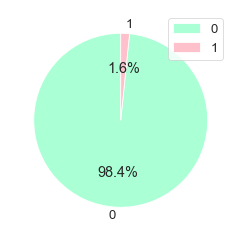

In [40]:
plot_pie(df, 'Medical_semi_int')

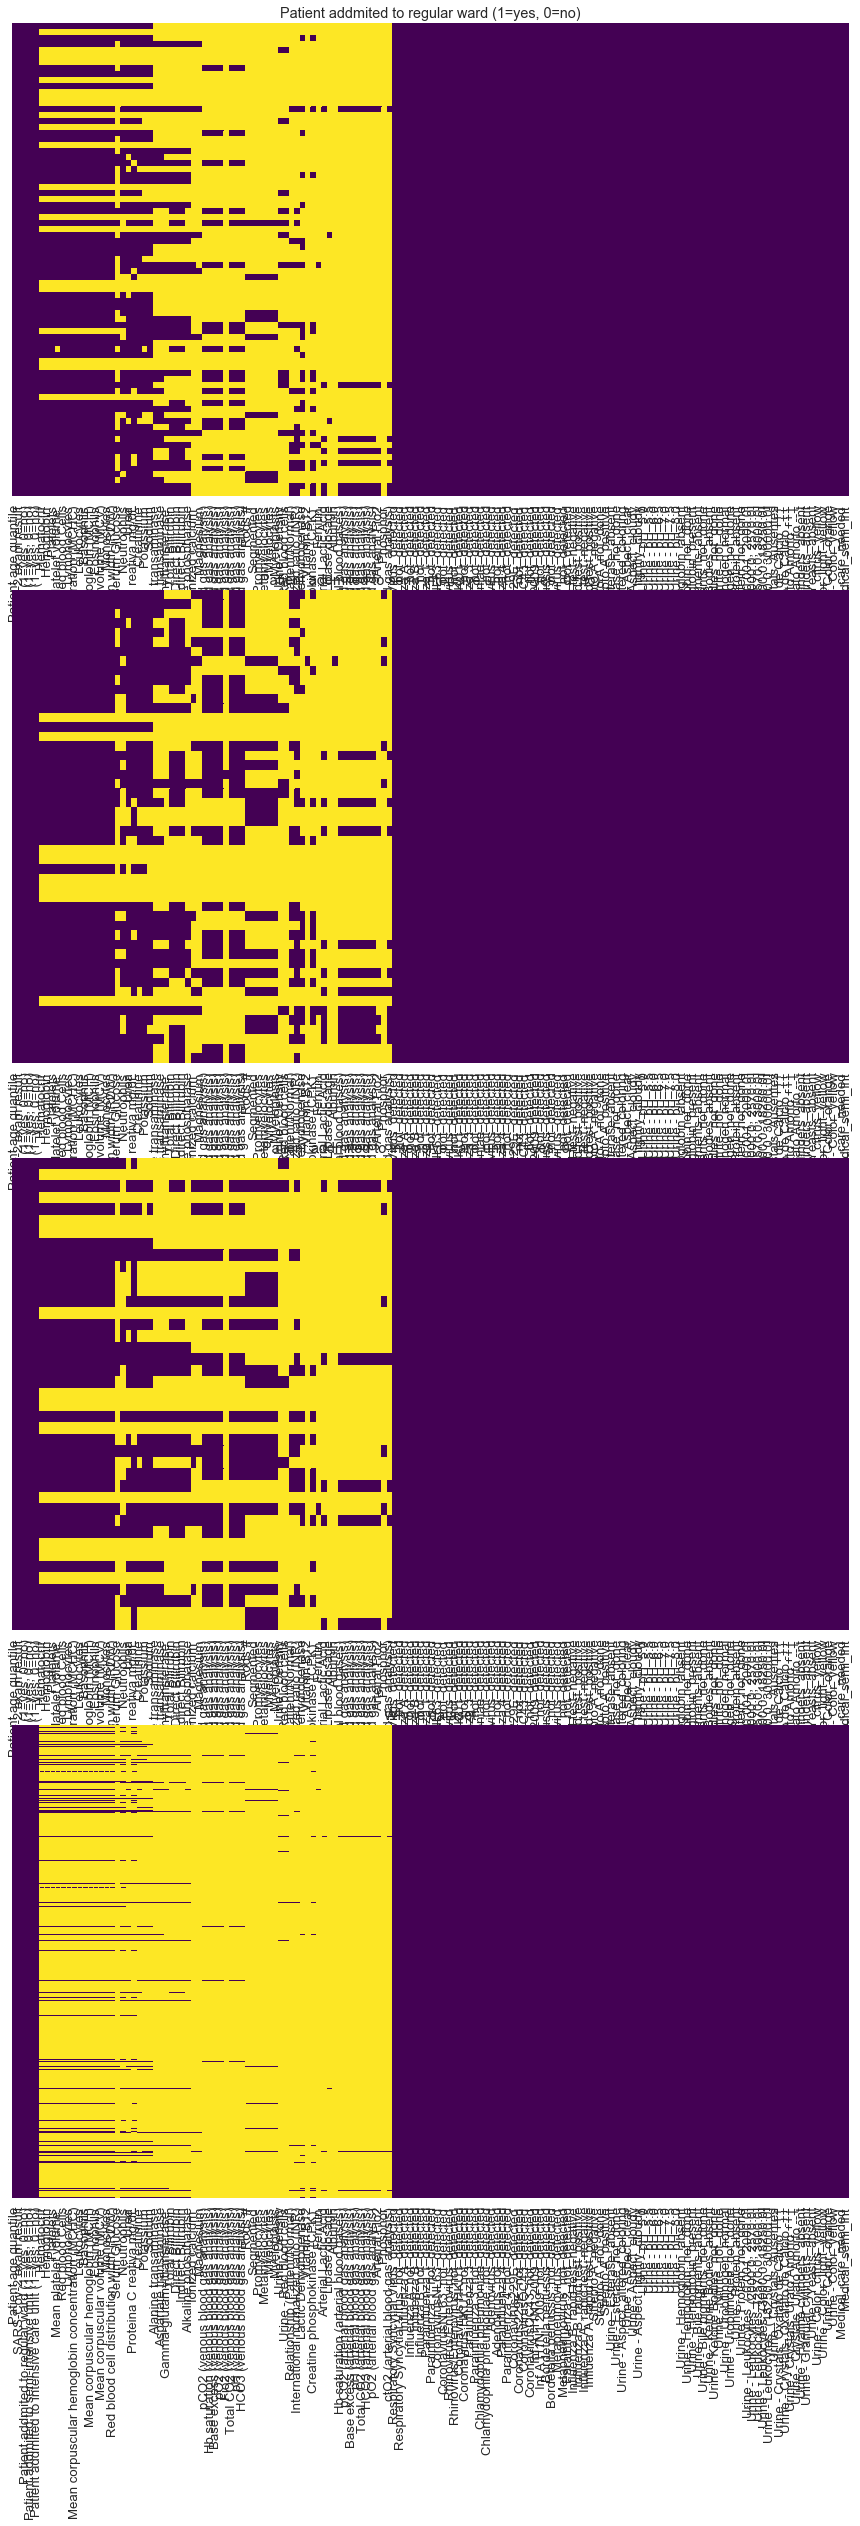

In [41]:
# plot about the missing values from the dataset
fig, ax = plt.subplots(nrows=4, ncols=1)
fig.set_figheight(40)
fig.set_figwidth(15)
for i in range(len(patient_cols)):
    ax[i].set_title(patient_cols[i])
    sns.heatmap(data=df[df[patient_cols[i]]==1].isna(), cmap='viridis', annot=False, cbar=False, ax=ax[i], 
               xticklabels=True, yticklabels=False)
ax[i+1].set_title('Whole dataset')
sns.heatmap(data=df.isna(), cmap='viridis', annot=False, cbar=False, ax=ax[i+1], 
               xticklabels=True, yticklabels=False)

Analysis about the correlation between the medical care need and the features of the dataset

In [42]:
def get_corr(data,features,base_feature):
    '''
    gets the correlation between the two input features
    features => features from which the correlation is going to be calculated
    base_feature => the base feature to be correlated
    data => the data from there the calculations are going to be done
    '''
    data_to = pd.Series()
    for feature in features:
        try:
            data_to[feature] = data[[base_feature,feature]].dropna().corr().iloc[1,0]
        except:
            continue
    return data_to.dropna().sort_values(ascending=False)
    

In [43]:
med_care = get_corr(df,num_features,'Medical_care_needed')
med_reg = get_corr(df,num_features,patient_cols[0])
med_semi = get_corr(df,num_features,patient_cols[1])
med_int = get_corr(df,num_features,patient_cols[2])

In [44]:
def get_tops(top, med_reg, med_semi, med_int):
    '''
    function gets the top correlated features from regular, semi-intensive and intensive care
    
    med_reg => correlations to medical care needed
    med_semi => correlations to semi-intensive care needed
    med_semi => correlations to intensive care needed
    '''
    top_reg_semi_int = [feature for feature in med_care.index if feature in med_reg.index[:top] and feature in med_semi.index[:top] and feature in med_int.index[:top]]
    top_semi_int = [feature for feature in med_care.index if feature in med_semi.index[:top] and feature in med_int.index[:top]]
    return top_reg_semi_int, top_semi_int

In [45]:
top10_reg_semi_int, top10_semi_int = get_tops(10, med_reg, med_semi, med_int)
top30_reg_semi_int, top30_semi_int = get_tops(30, med_reg, med_semi, med_int)
top50_reg_semi_int, top50_semi_int = get_tops(50, med_reg, med_semi, med_int)
top70_reg_semi_int, top70_semi_int = get_tops(70, med_reg, med_semi, med_int)

In [46]:
def print_tops(top_reg_semi_int):
    '''
    shows the top correlations
    
    top_reg_semi_int => calculated most important correlations
    '''
    for feature in top_reg_semi_int:
        print(feature)
        print(f'regular: {med_reg[feature]}')
        print(f'semi: {med_semi[feature]}')
        print(f'intensive: {med_int[feature]}\n')
    print('#########################\n')

In [47]:
print_tops(top10_reg_semi_int)
print_tops(top30_reg_semi_int)
print_tops(top50_reg_semi_int)
print_tops(top70_reg_semi_int)

#########################

#########################

Ferritin
regular: 0.4104114669509231
semi: 0.08440328804643951
intensive: 0.8199161838579846

Rods #
regular: 0.0847935928993173
semi: 0.18478339050264736
intensive: 0.3163249331109342

Lactic Dehydrogenase
regular: 0.1177640914624448
semi: 0.19121630492774827
intensive: 0.3613933759664472

Proteina C reativa mg/dL
regular: 0.1328408910183038
semi: 0.24102584287838452
intensive: 0.3048283402002134

Segmented
regular: 0.06308437337680706
semi: 0.08280871132398727
intensive: 0.20059734642169927

Serum Glucose
regular: 0.05874582556195002
semi: 0.19832793851975622
intensive: 0.12355101446538469

Red blood cell distribution width (RDW)
regular: 0.10215970532460461
semi: 0.09240570209044281
intensive: 0.19355973309605742

Inf A H1N1 2009_not_detected
regular: 0.14311328029211168
semi: 0.1314075070862458
intensive: 0.10986503079338596

Parainfluenza 4_not_detected
regular: 0.1396981909223605
semi: 0.12995280202739176
intensive: 0.11453712

In [48]:
# check tencences
def get_tend_tops(top_reg_semi_int):
    '''
    gets the risk tendence of each feature
    
    top_reg_semi_int => calculated most important correlations
    '''
    tendences = pd.Series()
    for feature in top_reg_semi_int:
        if med_reg[feature] < med_semi[feature] and med_semi[feature] < med_int[feature]:
            tendences[feature] = med_reg[feature], med_semi[feature] ,med_int[feature]
        elif med_reg[feature] > med_semi[feature] and med_semi[feature] > med_int[feature]:
            tendences[feature] = med_reg[feature], med_semi[feature] ,med_int[feature]
    return tendences

In [49]:
# shows the tendences
tendences = get_tend_tops(top50_reg_semi_int)
tendences2 = get_tend_tops(top70_reg_semi_int)
print(tendences)
print(f'\nnumber of features: {len(tendences.index)}')
print('\n')
print(tendences2)
print(f'\nnumber of features: {len(tendences2.index)}')

Rods #                                      (0.0847935928993173, 0.18478339050264736, 0.31...
Lactic Dehydrogenase                        (0.1177640914624448, 0.19121630492774827, 0.36...
Proteina C reativa mg/dL                    (0.1328408910183038, 0.24102584287838452, 0.30...
Segmented                                   (0.06308437337680706, 0.08280871132398727, 0.2...
Inf A H1N1 2009_not_detected                (0.14311328029211168, 0.1314075070862458, 0.10...
Parainfluenza 4_not_detected                (0.1396981909223605, 0.12995280202739176, 0.11...
Influenza A_not_detected                    (0.13944084295551692, 0.12973378089119345, 0.1...
Chlamydophila pneumoniae_not_detected       (0.13884307905154833, 0.12922513475875097, 0.1...
Coronavirus229E_not_detected                (0.13884307905154825, 0.12922513475875097, 0.1...
CoronavirusOC43_not_detected                (0.13875799230412664, 0.12915274378249145, 0.1...
Parainfluenza 1_not_detected                (0.1383337044788

In [50]:
print(df[tendences.index].isna().sum().sort_values(ascending=False))
print(f'\nlength of df_pos dataset: {len(df)}\n')
print( 1 - df[tendences.index].isna().sum().sort_values(ascending=False) / len(df))

Rods #                                      5547
Segmented                                   5547
Lactic Dehydrogenase                        5543
Proteina C reativa mg/dL                    5138
Urine - Aspect_clear                           0
Inf A H1N1 2009_not_detected                   0
Parainfluenza 4_not_detected                   0
Influenza A_not_detected                       0
Chlamydophila pneumoniae_not_detected          0
Coronavirus229E_not_detected                   0
CoronavirusOC43_not_detected                   0
Respiratory Syncytial Virus_not_detected       0
Bordetella pertussis_not_detected              0
Parainfluenza 2_not_detected                   0
Metapneumovirus_not_detected                   0
CoronavirusNL63_not_detected                   0
Coronavirus HKU1_not_detected                  0
Influenza B_not_detected                       0
Adenovirus_not_detected                        0
Parainfluenza 3_not_detected                   0
Rhinovirus/Enterovir

In [51]:
print(df[tendences2.index].isna().sum().sort_values(ascending=False))
print(f'\nlength of df_pos dataset: {len(df)}\n')
print( 1 - df[tendences2.index].isna().sum().sort_values(ascending=False) / len(df))

Rods #                                      5547
Segmented                                   5547
Lactic Dehydrogenase                        5543
Gamma-glutamyltransferase                   5491
Proteina C reativa mg/dL                    5138
Urine - Color_yellow                           0
Inf A H1N1 2009_not_detected                   0
Parainfluenza 4_not_detected                   0
Influenza A_not_detected                       0
Chlamydophila pneumoniae_not_detected          0
Coronavirus229E_not_detected                   0
CoronavirusOC43_not_detected                   0
Parainfluenza 1_not_detected                   0
Bordetella pertussis_not_detected              0
Parainfluenza 2_not_detected                   0
Metapneumovirus_not_detected                   0
Urine - pH_6.5                                 0
Coronavirus HKU1_not_detected                  0
Influenza B_not_detected                       0
Adenovirus_not_detected                        0
Parainfluenza 3_not_

#### Getting the correlation of the most important features

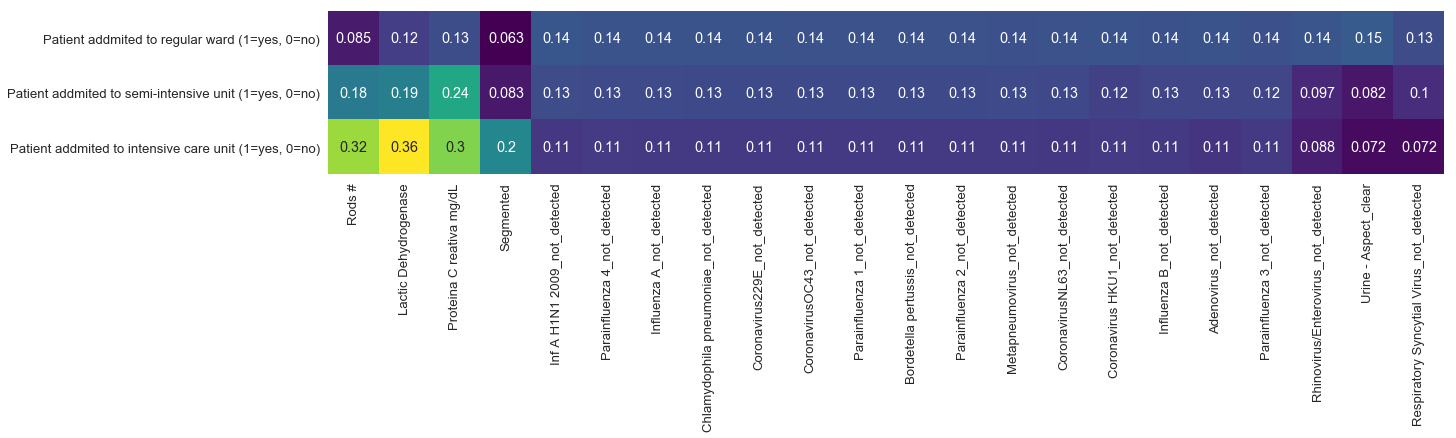

In [52]:
fig = plt.figure(figsize=(20,3))
sns.heatmap(df[list(tendences.index)+patient_cols].corr().iloc[-3:,:-3], annot=True, cmap='viridis', cbar=False)

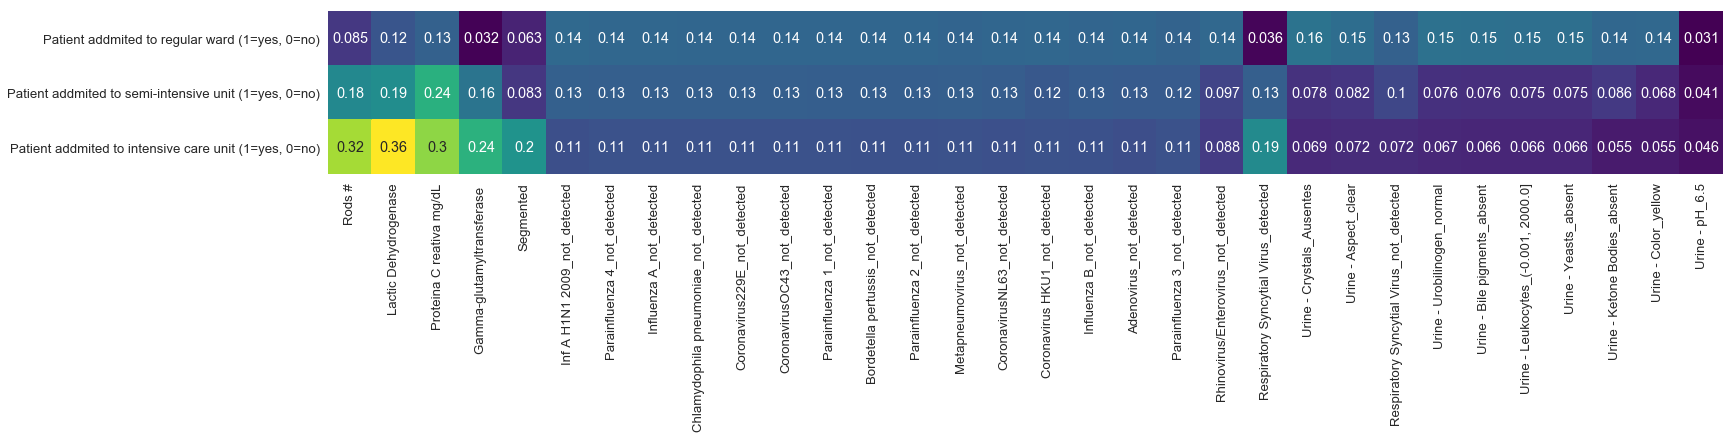

In [53]:
fig = plt.figure(figsize=(25,3))
sns.heatmap(df[list(tendences2.index)+patient_cols].corr().iloc[-3:,:-3], annot=True, cmap='viridis', cbar=False)

In [54]:
list(tendences.index)+patient_cols

['Rods #',
 'Lactic Dehydrogenase',
 'Proteina C reativa mg/dL',
 'Segmented',
 'Inf A H1N1 2009_not_detected',
 'Parainfluenza 4_not_detected',
 'Influenza A_not_detected',
 'Chlamydophila pneumoniae_not_detected',
 'Coronavirus229E_not_detected',
 'CoronavirusOC43_not_detected',
 'Parainfluenza 1_not_detected',
 'Bordetella pertussis_not_detected',
 'Parainfluenza 2_not_detected',
 'Metapneumovirus_not_detected',
 'CoronavirusNL63_not_detected',
 'Coronavirus HKU1_not_detected',
 'Influenza B_not_detected',
 'Adenovirus_not_detected',
 'Parainfluenza 3_not_detected',
 'Rhinovirus/Enterovirus_not_detected',
 'Urine - Aspect_clear',
 'Respiratory Syncytial Virus_not_detected',
 'Patient addmited to regular ward (1=yes, 0=no)',
 'Patient addmited to semi-intensive unit (1=yes, 0=no)',
 'Patient addmited to intensive care unit (1=yes, 0=no)']

In [55]:
list(tendences2.index)+patient_cols

['Rods #',
 'Lactic Dehydrogenase',
 'Proteina C reativa mg/dL',
 'Gamma-glutamyltransferase\xa0',
 'Segmented',
 'Inf A H1N1 2009_not_detected',
 'Parainfluenza 4_not_detected',
 'Influenza A_not_detected',
 'Chlamydophila pneumoniae_not_detected',
 'Coronavirus229E_not_detected',
 'CoronavirusOC43_not_detected',
 'Parainfluenza 1_not_detected',
 'Bordetella pertussis_not_detected',
 'Parainfluenza 2_not_detected',
 'Metapneumovirus_not_detected',
 'CoronavirusNL63_not_detected',
 'Coronavirus HKU1_not_detected',
 'Influenza B_not_detected',
 'Adenovirus_not_detected',
 'Parainfluenza 3_not_detected',
 'Rhinovirus/Enterovirus_not_detected',
 'Respiratory Syncytial Virus_detected',
 'Urine - Crystals_Ausentes',
 'Urine - Aspect_clear',
 'Respiratory Syncytial Virus_not_detected',
 'Urine - Urobilinogen_normal',
 'Urine - Bile pigments_absent',
 'Urine - Leukocytes_(-0.001, 2000.0]',
 'Urine - Yeasts_absent',
 'Urine - Ketone Bodies_absent',
 'Urine - Color_yellow',
 'Urine - pH_6.5',
 

In [56]:
# getting the best features from the dataset - 2 
usable_features2 = [feature for feature in list(tendences2.index) if feature not in patient_cols]
usable_features2

['Rods #',
 'Lactic Dehydrogenase',
 'Proteina C reativa mg/dL',
 'Gamma-glutamyltransferase\xa0',
 'Segmented',
 'Inf A H1N1 2009_not_detected',
 'Parainfluenza 4_not_detected',
 'Influenza A_not_detected',
 'Chlamydophila pneumoniae_not_detected',
 'Coronavirus229E_not_detected',
 'CoronavirusOC43_not_detected',
 'Parainfluenza 1_not_detected',
 'Bordetella pertussis_not_detected',
 'Parainfluenza 2_not_detected',
 'Metapneumovirus_not_detected',
 'CoronavirusNL63_not_detected',
 'Coronavirus HKU1_not_detected',
 'Influenza B_not_detected',
 'Adenovirus_not_detected',
 'Parainfluenza 3_not_detected',
 'Rhinovirus/Enterovirus_not_detected',
 'Respiratory Syncytial Virus_detected',
 'Urine - Crystals_Ausentes',
 'Urine - Aspect_clear',
 'Respiratory Syncytial Virus_not_detected',
 'Urine - Urobilinogen_normal',
 'Urine - Bile pigments_absent',
 'Urine - Leukocytes_(-0.001, 2000.0]',
 'Urine - Yeasts_absent',
 'Urine - Ketone Bodies_absent',
 'Urine - Color_yellow',
 'Urine - pH_6.5']

In [57]:
len(df[usable_features2].dropna())

12

#### The whole dataset is going to be used, after discovering which are the most important features to predict the need of intensive health care

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import confusion_matrix,classification_report
import lightgbm as lgb

In [58]:
scaler = MinMaxScaler()
scaler2 = StandardScaler()

In [62]:
# creating the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from tensorflow.keras import regularizers

#### Filling all the values with the median from the Infection group, based on the information if the patient has tested positive or negative to the SARS-Cov-2 exam

In [63]:
# imputing median values on the missing values
df_imp = df.copy()
neg = df_imp[df_imp['SARS-Cov-2 exam result']=='negative']
neg.fillna(neg.median(), inplace=True)
pos = df_imp[df_imp['SARS-Cov-2 exam result']=='positive']
pos.fillna(pos.median(), inplace= True)
df_median = pd.concat([neg,pos,pos,pos,pos,pos,pos,pos])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [507]:
nan = df_median.isna().sum().sort_values(ascending=False)

In [511]:
nan_data = [(nan.index[i], nan.values[i]) for i in range(len(nan)) if nan[i] > 0]

[('Fio2 (venous blood gas analysis)', 5643),
 ('Vitamin B12', 5641),
 ('Lipase dosage', 5636),
 ('Albumin', 5631),
 ('Phosphor', 5624),
 ('Arteiral Fio2', 5624),
 ('Ferritin', 5621),
 ('ctO2 (arterial blood gas analysis)', 5617),
 ('pO2 (arterial blood gas analysis)', 5617),
 ('HCO3 (arterial blood gas analysis)', 5617),
 ('Total CO2 (arterial blood gas analysis)', 5617),
 ('pH (arterial blood gas analysis)', 5617),
 ('Base excess (arterial blood gas analysis)', 5617),
 ('pCO2 (arterial blood gas analysis)', 5617),
 ('Hb saturation (arterial blood gases)', 5617),
 ('Arterial Lactic Acid', 5617),
 ('Magnesium', 5604),
 ('Ionized calcium\xa0', 5594),
 ('Urine - Red blood cells', 5574),
 ('Urine - Density', 5574),
 ('Relationship (Patient/Normal)', 5553),
 ('Myelocytes', 5547),
 ('Myeloblasts', 5547),
 ('Metamyelocytes', 5547),
 ('Promyelocytes', 5547),
 ('Segmented', 5547),
 ('Rods #', 5547),
 ('Lactic Dehydrogenase', 5543),
 ('Creatine phosphokinase\xa0(CPK)\xa0', 5540),
 ('Internationa

In [ ]:
if df_median.isna().sum().sort_values(ascending=False)[0] > 0:
    print('these features still have NaN values:')
    for feature, val in nan:
        print(f'{feature}: {val}')
    

In [195]:
df_median.head()

,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,...,Urine - Crystals_Urato Amorfo --+,Urine - Hyaline cylinders_absent,Urine - Granular cylinders_absent,Urine - Yeasts_absent,Urine - Color_citrus_yellow,Urine - Color_light_yellow,Urine - Color_orange,Urine - Color_yellow,Medical_care_needed,Medical_semi_int
0,13,negative,0,0,0,0.019074,-0.02234,0.022745,-0.101517,-0.003778,...,0,0,0,0,0,0,0,0,0,0
1,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,0.102004,...,0,0,0,0,0,0,0,0,0,0
2,8,negative,0,0,0,0.019074,-0.02234,0.022745,-0.101517,-0.003778,...,0,0,0,0,0,0,0,0,0,0
3,5,negative,0,0,0,0.019074,-0.02234,0.022745,-0.101517,-0.003778,...,0,0,0,0,0,0,0,0,0,0
4,15,negative,0,0,0,0.019074,-0.02234,0.022745,-0.101517,-0.003778,...,0,0,0,0,0,0,0,0,0,0


In [196]:
# checking the existence of missing values
df_median.isna().sum().sort_values(ascending=False)

Medical_semi_int                            0
Myeloblasts                                 0
Creatine phosphokinase (CPK)                0
Vitamin B12                                 0
Lactic Dehydrogenase                        0
International normalized ratio (INR)        0
Relationship (Patient/Normal)               0
Urine - Red blood cells                     0
Urine - Density                             0
Myelocytes                                  0
pO2 (venous blood gas analysis)             0
Metamyelocytes                              0
Promyelocytes                               0
Segmented                                   0
Rods #                                      0
HCO3 (venous blood gas analysis)            0
pH (venous blood gas analysis)              0
Total CO2 (venous blood gas analysis)       0
Ferritin                                    0
Arterial Lactic Acid                        0
Lipase dosage                               0
Albumin                           

In [197]:
df_model = df_median[tendences2.index]

In [198]:
df_model.isna().sum().sort_values(ascending=False)

Urine - pH_6.5                              0
Urine - Color_yellow                        0
Lactic Dehydrogenase                        0
Proteina C reativa mg/dL                    0
Gamma-glutamyltransferase                   0
Segmented                                   0
Inf A H1N1 2009_not_detected                0
Parainfluenza 4_not_detected                0
Influenza A_not_detected                    0
Chlamydophila pneumoniae_not_detected       0
Coronavirus229E_not_detected                0
CoronavirusOC43_not_detected                0
Parainfluenza 1_not_detected                0
Bordetella pertussis_not_detected           0
Parainfluenza 2_not_detected                0
Metapneumovirus_not_detected                0
CoronavirusNL63_not_detected                0
Coronavirus HKU1_not_detected               0
Influenza B_not_detected                    0
Adenovirus_not_detected                     0
Parainfluenza 3_not_detected                0
Rhinovirus/Enterovirus_not_detecte

## Creating a model which needs less parameters to make predictions

The main objective of the model is to predict if someone, which is infected with the SARS-CoV-2 is going to need semi-intensive or intensive medical care.

But in order to make the model as usable as possible, just the normal blood and urine exams features are going to be used, so that with simple conventional blood and urine exams it is possible to predict the need of semi-intensive or intensive care.

The idea is that the model is going to be used to help the healthcare organization to manage better the infra structure ressources

#### Droping the information about the medical care needs from the training set and one-hot encoding the feature "SARS-CoV-2 exam result"

In [317]:
drop_features = [feature for feature in df_median.columns if 'Medical' in feature or 'Patient addmi' in feature or 'SARS-Cov-2 exam result' in feature]
print('Features, which are going to be droped')
drop_features

Features, which are going to be droped


['SARS-Cov-2 exam result',
 'Patient addmited to regular ward (1=yes, 0=no)',
 'Patient addmited to semi-intensive unit (1=yes, 0=no)',
 'Patient addmited to intensive care unit (1=yes, 0=no)',
 'Medical_care_needed',
 'Medical_semi_int']

In [318]:
X = df_median.drop(drop_features, axis=1)
X['SARS-Cov-2 exam result'] = pd.get_dummies(df_median['SARS-Cov-2 exam result'],drop_first=True)
y = df_median['Medical_semi_int']

In [319]:
for feature in X.columns:
    print(feature)

Patient age quantile
Hematocrit
Hemoglobin
Platelets
Mean platelet volume 
Red blood Cells
Lymphocytes
Mean corpuscular hemoglobin concentration (MCHC)
Leukocytes
Basophils
Mean corpuscular hemoglobin (MCH)
Eosinophils
Mean corpuscular volume (MCV)
Monocytes
Red blood cell distribution width (RDW)
Serum Glucose
Neutrophils
Urea
Proteina C reativa mg/dL
Creatinine
Potassium
Sodium
Alanine transaminase
Aspartate transaminase
Gamma-glutamyltransferase 
Total Bilirubin
Direct Bilirubin
Indirect Bilirubin
Alkaline phosphatase
Ionized calcium 
Magnesium
pCO2 (venous blood gas analysis)
Hb saturation (venous blood gas analysis)
Base excess (venous blood gas analysis)
pO2 (venous blood gas analysis)
Fio2 (venous blood gas analysis)
Total CO2 (venous blood gas analysis)
pH (venous blood gas analysis)
HCO3 (venous blood gas analysis)
Rods #
Segmented
Promyelocytes
Metamyelocytes
Myelocytes
Myeloblasts
Urine - Density
Urine - Red blood cells
Relationship (Patient/Normal)
International normalized 

#### Droping all the specific information, which is not available in conventional blood and urine exams

In [320]:
print('Features, which are going to be droped for the training')
to_drop = [feature for feature in df_median.columns if 'detected' in feature or 'positive' in feature or 'negative' in feature]
to_drop

Features, which are going to be droped for the training


['Respiratory Syncytial Virus_detected',
 'Respiratory Syncytial Virus_not_detected',
 'Influenza A_detected',
 'Influenza A_not_detected',
 'Influenza B_detected',
 'Influenza B_not_detected',
 'Parainfluenza 1_detected',
 'Parainfluenza 1_not_detected',
 'CoronavirusNL63_detected',
 'CoronavirusNL63_not_detected',
 'Rhinovirus/Enterovirus_detected',
 'Rhinovirus/Enterovirus_not_detected',
 'Coronavirus HKU1_detected',
 'Coronavirus HKU1_not_detected',
 'Parainfluenza 3_detected',
 'Parainfluenza 3_not_detected',
 'Chlamydophila pneumoniae_detected',
 'Chlamydophila pneumoniae_not_detected',
 'Adenovirus_detected',
 'Adenovirus_not_detected',
 'Parainfluenza 4_detected',
 'Parainfluenza 4_not_detected',
 'Coronavirus229E_detected',
 'Coronavirus229E_not_detected',
 'CoronavirusOC43_detected',
 'CoronavirusOC43_not_detected',
 'Inf A H1N1 2009_detected',
 'Inf A H1N1 2009_not_detected',
 'Bordetella pertussis_detected',
 'Bordetella pertussis_not_detected',
 'Metapneumovirus_detected',

In [321]:
X.drop(to_drop, axis=1, inplace=True)

#### Checking all the features, which are going to be used for training the model

In [322]:
# All the features which are going to be used to train
features = [col for col in X.columns]
print(len(features))
features

110


['Patient age quantile',
 'Hematocrit',
 'Hemoglobin',
 'Platelets',
 'Mean platelet volume ',
 'Red blood Cells',
 'Lymphocytes',
 'Mean corpuscular hemoglobin concentration\xa0(MCHC)',
 'Leukocytes',
 'Basophils',
 'Mean corpuscular hemoglobin (MCH)',
 'Eosinophils',
 'Mean corpuscular volume (MCV)',
 'Monocytes',
 'Red blood cell distribution width (RDW)',
 'Serum Glucose',
 'Neutrophils',
 'Urea',
 'Proteina C reativa mg/dL',
 'Creatinine',
 'Potassium',
 'Sodium',
 'Alanine transaminase',
 'Aspartate transaminase',
 'Gamma-glutamyltransferase\xa0',
 'Total Bilirubin',
 'Direct Bilirubin',
 'Indirect Bilirubin',
 'Alkaline phosphatase',
 'Ionized calcium\xa0',
 'Magnesium',
 'pCO2 (venous blood gas analysis)',
 'Hb saturation (venous blood gas analysis)',
 'Base excess (venous blood gas analysis)',
 'pO2 (venous blood gas analysis)',
 'Fio2 (venous blood gas analysis)',
 'Total CO2 (venous blood gas analysis)',
 'pH (venous blood gas analysis)',
 'HCO3 (venous blood gas analysis)',

#### Splitting the data set into training_set and test_set

In [323]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
X_train = scaler2.fit_transform(X_train)
X_test = scaler2.transform(X_test)
print(f'features X_train: {len(X_train[1])}\nfeatures X_test: {len(X_test[1])}')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


features X_train: 110
features X_test: 110


#### Testing the performance with AdaBoost Classifier and LightGBM algorithms

In [324]:
adac = AdaBoostClassifier()
adac.fit(X_train,y_train)
adac_pred = adac.predict(X_test)
print(classification_report(y_test, adac_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1662
           1       0.63      0.38      0.47        32

   micro avg       0.98      0.98      0.98      1694
   macro avg       0.81      0.69      0.73      1694
weighted avg       0.98      0.98      0.98      1694



In [325]:
lgbc = lgb.LGBMClassifier()
lgbc.fit(X_train, y_train,)
lgbc_pred=lgbc.predict(X_test)
print(classification_report(y_test, np.round(lgbc_pred)))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1662
           1       0.73      0.34      0.47        32

   micro avg       0.99      0.99      0.99      1694
   macro avg       0.86      0.67      0.73      1694
weighted avg       0.98      0.99      0.98      1694



#### function which determines the learn decay rate

In [208]:
def lr_scheduler(epoch, lr):
    decay_rate = 0.99
    decay_step = 10
    if epoch % decay_step == 0 and epoch:
        return lr * pow(decay_rate, np.floor(epoch / decay_step))
    return lr

In [209]:
from kerastuner.tuners import RandomSearch
from kerastuner import HyperParameters,Objective

#### function that gets the f1-score as metrics

In [210]:
import tensorflow.keras.backend as K

def get_f1(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

### Creating a Random Search for hyperparameter tuning

Creating a kerastuner HyperPararmeter objetct to perform the random search

In [211]:
hp = HyperParameters()

#### Creating a funtion to build the model architecture for each random search iteration

In [212]:
def build_model(hp):
    '''
    function that creates the model for the random search
    
    input:
    hp - objetc from the HyperParameter class from the kerastuner library
    
    output:
    model - created model with the random hyperparameters for the random search'''
    
    model = Sequential()

    model.add(Dense(hp.Int('units_1',min_value=30, max_value=100, sampling='linear', default=75),
                    activation='relu', kernel_regularizer=regularizers.l2(l=0.1)))
    model.add(Dropout(rate=hp.Choice('drop_out_1',values=[0.,0.1,0.2,0.3,0.4,0.5], default=0.3)))

    model.add(BatchNormalization())
    model.add(Dense(hp.Int('units_2',min_value=30, max_value=100, sampling='linear', default=75),
                    activation='relu', kernel_regularizer=regularizers.l2(l=0.1)))
    model.add(Dropout(rate=hp.Choice('drop_out_2',values=[0.,0.1,0.2,0.3,0.4,0.5], default=0.3)))

    model.add(BatchNormalization())
    model.add(Dense(hp.Int('units_3',min_value=20, max_value=50, sampling='linear', default=50),
                    activation='relu', kernel_regularizer=regularizers.l2(l=0.1)))
    model.add(Dropout(rate=hp.Choice('drop_out_3',values=[0.,0.1,0.2,0.3], default=0.3)))

    model.add(BatchNormalization())
    model.add(Dense(hp.Int('units_4',min_value=5, max_value=20, sampling='linear', default=20),
                    activation='relu', kernel_regularizer=regularizers.l2(l=0.1)))
    model.add(Dropout(rate=hp.Choice('drop_out_4',values=[0.,0.1,0.2,0.3], default=0.3)))

    model.add(BatchNormalization())
    model.add(Dense(1, activation=hp.Choice('last_activation',['sigmoid','hard_sigmoid'])))

    adam = optimizers.Adam(learning_rate=hp.Float( 'learning_rate',
                                                    min_value=1e-6,
                                                    max_value=1e-3,
                                                    sampling='LOG',
                                                    default=1e-3), 
                           beta_1=0.9, beta_2=0.999, amsgrad=True)
              
    model.compile(optimizer=adam, loss=hp.Choice('loss_function', ['binary_crossentropy','hinge','squared_hinge']), metrics=[get_f1])
    return model

In [213]:
# definition of the early stop parameters
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)
class_weight = {0: 1., 1: 10.}

#### Creating the random search tuner

In [214]:
# creation of the RandomSearch object 'tuner' to perform the random search
import os
tuner = RandomSearch(
    build_model,
    objective = Objective('val_get_f1', 'max'), 
    max_trials=10,
    executions_per_trial=3,
    directory= os.path.normpath('C:/'),
    project_name='MedCare_v5')

INFO:tensorflow:Reloading Oracle from existing project C:\MedCare_v5\oracle.json
INFO:tensorflow:Reloading Tuner from C:\MedCare_v5\tuner0.json


In [215]:
tuner.search_space_summary()

#### Performing the random search 

In [216]:
tuner.search(x=np.array(X_train), y=np.array(y_train), validation_data=(np.array(X_test), np.array(y_test)),
             batch_size = 128, epochs = 2000, class_weight=class_weight)#, callbacks=[LearningRateScheduler(lr_scheduler, verbose=1)])

INFO:tensorflow:Oracle triggered exit


#### getting the best 5 models based on the f1-score performance

In [217]:
model_1 = tuner.get_best_models(num_models=5)[0]
model_2 = tuner.get_best_models(num_models=5)[1]
model_3 = tuner.get_best_models(num_models=5)[2]
model_4 = tuner.get_best_models(num_models=5)[3]
model_5 = tuner.get_best_models(num_models=5)[4]
models = [model_1, model_2, model_3, model_4, model_5]

#### showing the results of the random search

In [218]:
tuner.results_summary()

#### printing the classification report of the 5 best models which came from the random search

In [326]:
print('#############################################################################')
print('model_1')
print('#############################################################################')
predictions = model_1.predict_classes(X_test)
print(classification_report(y_test, predictions))
print('#############################################################################')
print('model_2')
print('#############################################################################')
predictions = model_2.predict_classes(X_test)
print(classification_report(y_test, predictions))
print('#############################################################################')
print('model_3')
print('#############################################################################')
predictions = model_3.predict_classes(X_test)
print(classification_report(y_test, predictions))
print('#############################################################################')
print('model_4')
print('#############################################################################')
predictions = model_4.predict_classes(X_test)
print(classification_report(y_test, predictions))
print('#############################################################################')
print('model_5')
print('#############################################################################')
predictions = model_5.predict_classes(X_test)
print(classification_report(y_test, predictions))
print('#############################################################################')
print('AdaBoost')
print('#############################################################################')
predictions = adac.predict(X_test)
print(classification_report(y_test, predictions))
print('#############################################################################')
print('LightGBM')
print('#############################################################################')
predictions = lgbc.predict(X_test)
print(classification_report(y_test, predictions))
print('#############################################################################')


#############################################################################
1
#############################################################################
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1662
           1       0.61      0.62      0.62        32

   micro avg       0.99      0.99      0.99      1694
   macro avg       0.80      0.81      0.80      1694
weighted avg       0.99      0.99      0.99      1694

#############################################################################
2
#############################################################################
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1662
           1       0.77      0.62      0.69        32

   micro avg       0.99      0.99      0.99      1694
   macro avg       0.88      0.81      0.84      1694
weighted avg       0.99      0.99      0.99      1694

##############################

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:56: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return getattr(obj, method)(*args, **kwds)


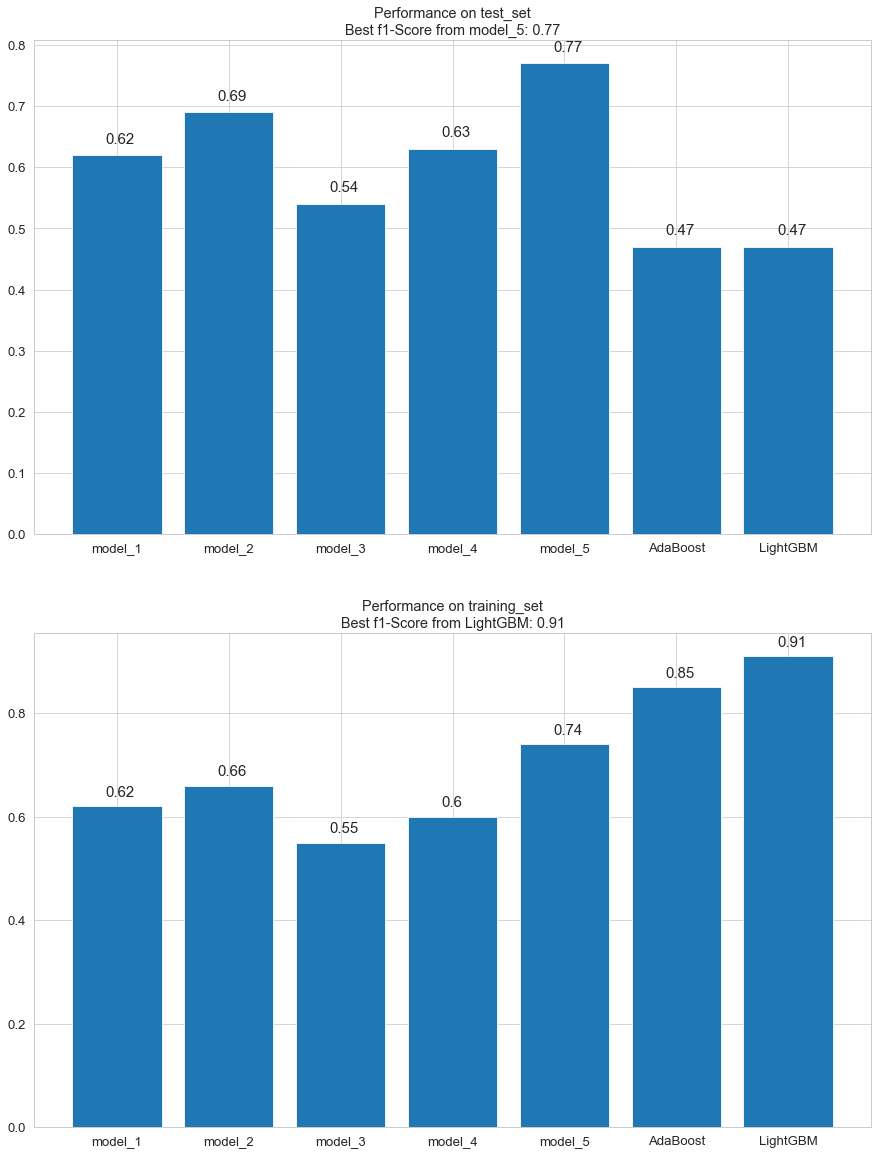

In [327]:
n_models = 5
cache_test = {'model_'+str(i+1):[] for i in range(n_models)}
cache_test['AdaBoost'] = []
cache_test['LightGBM'] = []
cache_train = {'model_'+str(i+1):[] for i in range(n_models)}
cache_train['AdaBoost'] = []
cache_train['LightGBM'] = []

# getting the performance of the 5 best models from the random search
for i in range(n_models):
    predictions = models[i].predict_classes(X_test)
    cache_test['model_'+str(i+1)].append(float(classification_report(y_test, predictions)[148:153]))
    predictions = models[i].predict_classes(X_train)
    cache_train['model_'+str(i+1)].append(float(classification_report(y_train, predictions)[148:153]))

adac_pred = adac.predict(X_test)
cache_test['AdaBoost'].append(float(classification_report(y_test, adac_pred)[148:153]))
lgbc_pred = lgbc.predict(X_test)
cache_test['LightGBM'].append(float(classification_report(y_test, lgbc_pred)[148:153]))

adac_pred = adac.predict(X_train)
cache_train['AdaBoost'].append(float(classification_report(y_train, adac_pred)[148:153]))
lgbc_pred = lgbc.predict(X_train)
cache_train['LightGBM'].append(float(classification_report(y_train, lgbc_pred)[148:153]))

# transforming the generated dictionaries into pandas dataframes
cache_test = pd.DataFrame(cache_test)
cache_train = pd.DataFrame(cache_train)

best_test = f'Best f1-Score from {np.argmax(cache_test.mean())}: {round(cache_test.mean().max(),2)}'
best_train = f'Best f1-Score from {np.argmax(cache_train.mean())}: {round(cache_train.mean().max(),2)}'
fig, ax = plt.subplots(nrows=2, ncols=1)
fig.set_figheight(20)
fig.set_figwidth(15)
ax[0].set_title('Performance on test_set\n' + best_test)
ax[0].bar(x=cache_test.mean().index, height=cache_test.mean().values)
ax[1].set_title('Performance on training_set\n' + best_train)
ax[1].bar(x=cache_train.mean().index, height=cache_train.mean().values)
for i in range(len(ax)):
    for p in ax[i].patches:
        ax[i].annotate(f'{round(p.get_height(),2)}', (p.get_x()+0.3, p.get_height()+0.02), fontsize=15)

The AdaBoost and LightGBM model perform better on the training_set but considerably poorer on the test set

#### performing a cross validation process with the reassembling and redistributing test_set n-times

In [377]:
n = 50
n_models = 5
cache_test = {'model_'+str(i+1):[] for i in range(n_models)}
cache_test['AdaBoost'] = []
cache_test['LightGBM'] = []
cache_train = {'model_'+str(i+1):[] for i in range(n_models)}
cache_train['AdaBoost'] = []
cache_train['LightGBM'] = []
for j in range(n):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=j)
    X_train = scaler2.fit_transform(X_train)
    X_test = scaler2.transform(X_test)
    
    # getting the performance of the 5 best models from the random search
    for i in range(n_models):
        predictions = models[i].predict_classes(X_test)
        cache_test['model_'+str(i+1)].append(float(classification_report(y_test, predictions)[148:153]))
#         predictions = models[i].predict_classes(X_train)
#         cache_train['model_'+str(i+1)].append(float(classification_report(y_train, predictions)[148:153]))
        
    adac_pred = adac.predict(X_test)
    cache_test['AdaBoost'].append(float(classification_report(y_test, adac_pred)[148:153]))
    lgbc_pred = lgbc.predict(X_test)
    cache_test['LightGBM'].append(float(classification_report(y_test, lgbc_pred)[148:153]))
    
#     adac_pred = adac.predict(X_train)
#     cache_train['AdaBoost'].append(float(classification_report(y_train, adac_pred)[148:153]))
#     lgbc_pred = lgbc.predict(X_train)
#     cache_train['LightGBM'].append(float(classification_report(y_train, lgbc_pred)[148:153]))
    
# transforming the generated dictionaries into pandas dataframes
cache_test = pd.DataFrame(cache_test)
cache_train = pd.DataFrame(cache_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  if sys.path[0] == '':
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype ui

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  if sys.path[0] == '':
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  if sys.path[0] == '':
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  if sys.path[0] == '':
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DataConversionWarning: Data with input d

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  if sys.path[0] == '':
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype ui

#### plotting the performance of the 5 best models along the n-times tests based on the redistribution of the testset

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:56: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return getattr(obj, method)(*args, **kwds)


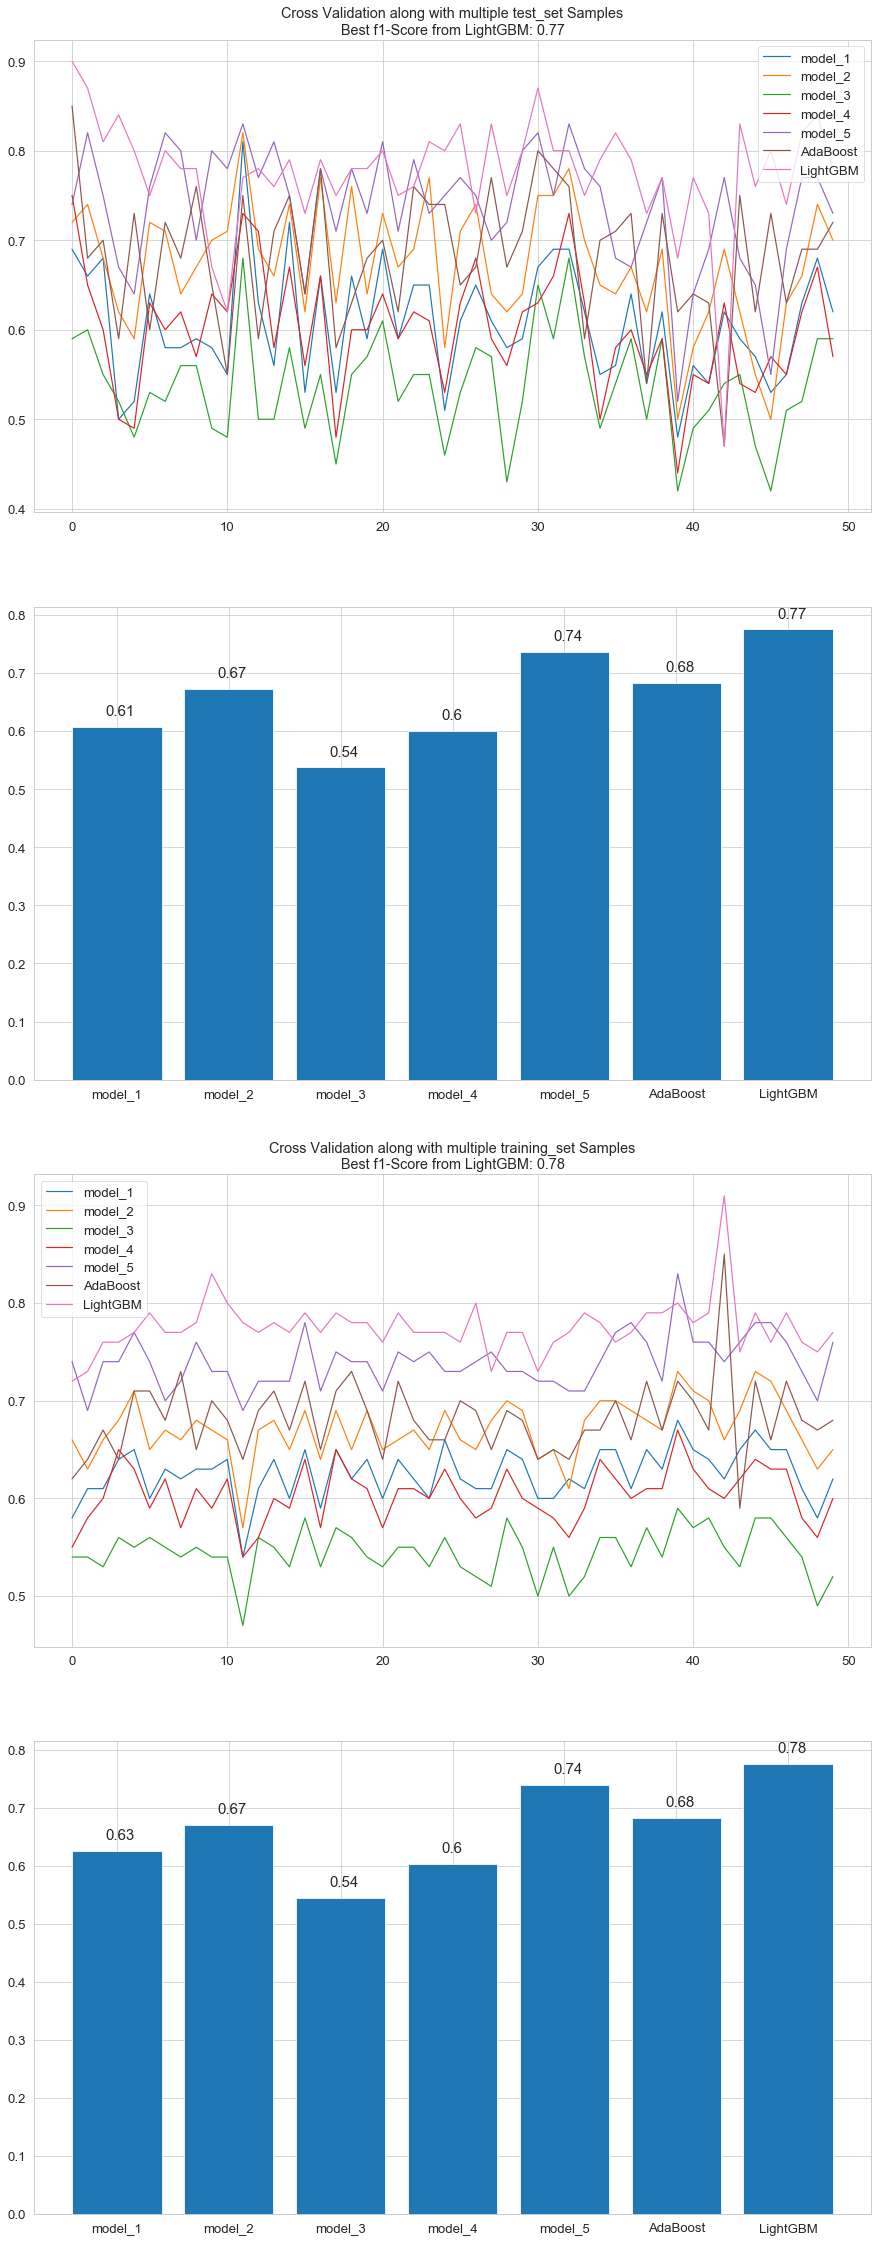

In [331]:
fig, ax = plt.subplots(nrows=4, ncols=1)
fig.set_figheight(40)
fig.set_figwidth(15)
best_test = f'Best f1-Score from {np.argmax(cache_test.mean())}: {round(cache_test.mean().max(),2)}'
best_train = f'Best f1-Score from {np.argmax(cache_train.mean())}: {round(cache_train.mean().max(),2)}'
ax[0].set_title('Cross Validation along with multiple test_set Samples\n' + best_test)
sns.lineplot(data=cache_test, ax=ax[0], dashes=False)
ax[1].bar(x=cache_test.mean().index, height=cache_test.mean().values)

# print('\n\n')
# ax[2].set_title('Cross Validation along with multiple training_set Samples\n' + best_train)
# sns.lineplot(data= cache_train, ax=ax[2], dashes=False)
# ax[3].bar(x=cache_train.mean().index, height=cache_train.mean().values)
for i in range(len(ax)):
    if i%2==1:
        for p in ax[i].patches:
            ax[i].annotate(f'{round(p.get_height(),2)}', (p.get_x()+0.3, p.get_height()+0.02), fontsize=15)

The performance of model_5 and the another neural network models showed themselfes more stable along the crossvalidation with less variation along the different test samples.

#### saving the best model (normaly commented to avoid overwriting the models)

In [ ]:
#model_4.save("model_MedCare_random_search_v6.h5")

# Analysis of the best model

The model saved with the name "model_MedCare_random_search_v5.h5" showed the best performance and will be further analysed

In [519]:
import tensorflow as tf
model = tf.keras.models.load_model('model_MedCare_random_search_v5.h5')

In [520]:
model.get_config()

{'name': 'sequential',
 'layers': [{'class_name': 'Dense',
   'config': {'name': 'dense',
    'trainable': True,
    'dtype': 'float32',
    'units': 52,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': {'class_name': 'L1L2',
     'config': {'l1': 0.0, 'l2': 0.10000000149011612}},
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dropout',
   'config': {'name': 'dropout',
    'trainable': True,
    'dtype': 'float32',
    'rate': 0.5,
    'noise_shape': None,
    'seed': None}},
  {'class_name': 'BatchNormalization',
   'config': {'name': 'batch_normalization',
    'trainable': True,
    'dtype': 'float32',
    'axis': ListWrapper([1]),
    'momentum': 0.99,
    'epsilon': 0.001,
    'center': True,
    'scale': True,


In [521]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  5772      
_________________________________________________________________
dropout (Dropout)            multiple                  0         
_________________________________________________________________
batch_normalization (BatchNo multiple                  208       
_________________________________________________________________
dense_1 (Dense)              multiple                  4664      
_________________________________________________________________
dropout_1 (Dropout)          multiple                  0         
_________________________________________________________________
batch_normalization_1 (Batch multiple                  352       
_________________________________________________________________
dense_2 (Dense)              multiple                  3

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1665
           1       0.83      0.66      0.73        29

   micro avg       0.99      0.99      0.99      1694
   macro avg       0.91      0.83      0.86      1694
weighted avg       0.99      0.99      0.99      1694



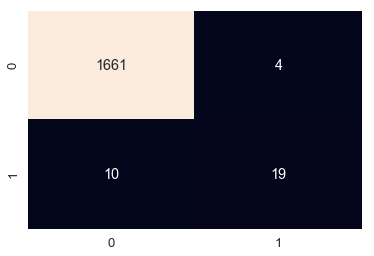

In [523]:
predictions_test = model.predict_classes(X_test)
print(classification_report(y_test, predictions_test))
sns.heatmap(confusion_matrix(y_test,predictions_test), annot=True, fmt='g', cbar=False)

In [527]:
from sklearn.metrics import roc_auc_score, roc_curve
probs = model.predict_proba(X_test)
roc_score = roc_auc_score(y_test, probs)
print(roc_score)

0.9626488557523041


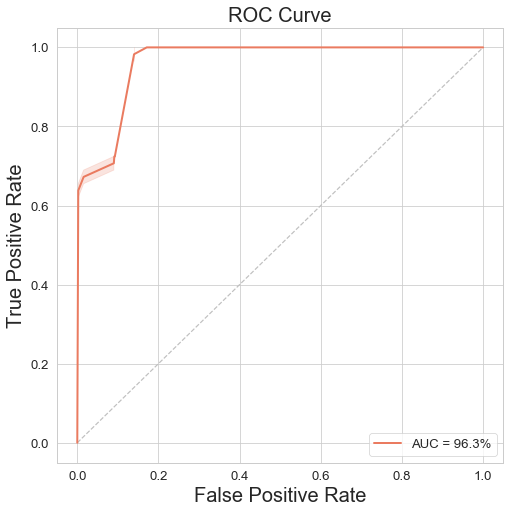

In [529]:
f, ax = plt.subplots(figsize=(8, 8))
plt.plot([0, 1], [0, 1], '--', color='silver')
plt.title('ROC Curve', fontsize=20)
plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=20)
fpr, tpr, thresholds = roc_curve(y_test, probs) 
sns.lineplot(x=fpr, y=tpr, color=sns.color_palette("coolwarm", 10)[-2], 
             linewidth=2, label= f"AUC = {round(roc_score,3)*100}%", ax=ax)

In [530]:
from sklearn.metrics import average_precision_score, precision_score,average_precision_score
# average_precision = average_precision_score(y_test, predictions_test)
average_precision = average_precision_score(y_test, probs)
print(average_precision)

0.5852618685289956


In [533]:
from sklearn.metrics import precision_recall_curve

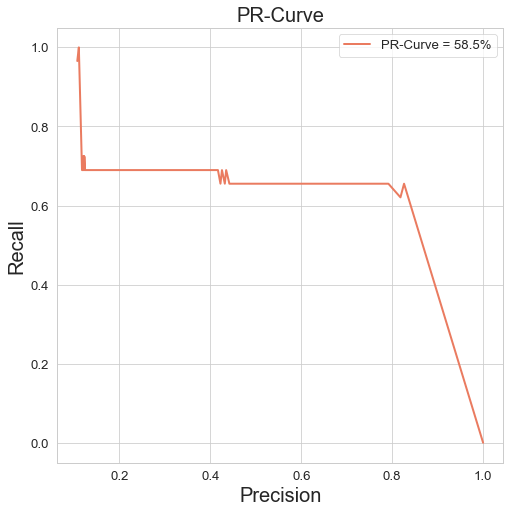

In [534]:
f, ax = plt.subplots(figsize=(8, 8))
plt.title('PR-Curve', fontsize=20)
plt.xlabel('Precision', fontsize=20)
plt.ylabel('Recall', fontsize=20)
fpr, tpr, thresholds = precision_recall_curve(y_test, probs)
sns.lineplot(x=fpr, y=tpr, color=sns.color_palette("coolwarm", 10)[-2], 
             linewidth=2, label= f"PR-Curve = {round(average_precision,3)*100}%", ax=ax)

In [541]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score
def print_scores(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print("Accuracy: %.2f%%" % (accuracy * 100.0))
    print("Precision: %.2f%% " % (precision * 100))
    print("Recall: %.2f%% " % (recall * 100))
    print("AUC: %.2f%% " % (roc * 100))
    print("F1-Score: %.2f%% " % (f1 * 100))

In [542]:
print_scores(y_test,predictions_test)

Accuracy: 99.17%
Precision: 82.61% 
Recall: 65.52% 
AUC: 82.64% 
F1-Score: 73.08% 


In [544]:
from xgboost import XGBClassifier, plot_importance

In [546]:
xgbc = XGBClassifier()
xgbc.fit(X_train, y_train)
xgbc_pred=xgbc.predict(X_test)
print(classification_report(y_test, np.round(xgbc_pred)))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1665
           1       0.71      0.17      0.28        29

   micro avg       0.98      0.98      0.98      1694
   macro avg       0.85      0.59      0.64      1694
weighted avg       0.98      0.98      0.98      1694

